# Milestones 2

## Perkenalan

- Nama : Elita Kabayeva
- Batch : 008

## Tujuan

Membuat model machine learning untuk prediksi suatu label

## Import Libraries

Pertama, saya akan melakukan import libraries yang akan digunakan pada dataset ini:

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

## Data Loading

Kemudian, saya akan melakukan loading data dan membuat copy dari dataset tersebut sebagai backup:

In [3]:
data = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
data_ori = data.copy

Untuk mendapat gambaran awal dari data, kita melihat shapenya terlebih dahulu:

In [4]:
data.shape

(614, 13)

Lalu print 5 data pertama

In [5]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Kemudian saya menggunakan data info untuk melihat kolom yang ada pada dataset ini:

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Setelah itu menggunakan percent missing, saya melihat persebaran missing values pada dataset ini:

In [7]:
percent_missing = (data.isnull().sum() * 100 / len(data)).round(2)
missing_value_data = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing})
missing_value_data.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_data

,column_name,percent_missing
Credit_History,Credit_History,8.14
Self_Employed,Self_Employed,5.21
LoanAmount,LoanAmount,3.58
Dependents,Dependents,2.44
Loan_Amount_Term,Loan_Amount_Term,2.28
Gender,Gender,2.12
Married,Married,0.49
Loan_ID,Loan_ID,0.00
Education,Education,0.00
ApplicantIncome,ApplicantIncome,0.00


Lalu untuk melihat outliers dan persebaran statistiknya saya menggunakan data describe

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


## Preliminary Data Analysis

In [9]:
def unique_values(df):
    print("unique values\n")
    for col in df.columns:
        if df[col].dtypes=='object':
            if len(df[col].unique())>5:
                print('{:>15s} \t more than 5 unique'.format(col))
            else:
                print('{:>15s} \t {}'.format(col,df[col].unique()))


In [10]:
unique_values(data)

unique values

        Loan_ID 	 more than 5 unique
         Gender 	 ['Male' 'Female' nan]
        Married 	 ['No' 'Yes' nan]
     Dependents 	 ['0' '1' '2' '3+' nan]
      Education 	 ['Graduate' 'Not Graduate']
  Self_Employed 	 ['No' 'Yes' nan]
  Property_Area 	 ['Urban' 'Rural' 'Semiurban']
    Loan_Status 	 ['Y' 'N']


In [11]:
print("Duplicate Records in Dataset : {}".format(data.duplicated().sum()))

Duplicate Records in Dataset : 0


In [12]:
Approved = len(data[data['Loan_Status']=='Y'])
Rejected = len(data[data['Loan_Status']=='N'])

print("Loan OK vs not OK {:>3.2f}%".format(Rejected/Approved*100))

Loan OK vs not OK 45.50%


## Exploratory Data Analysis 

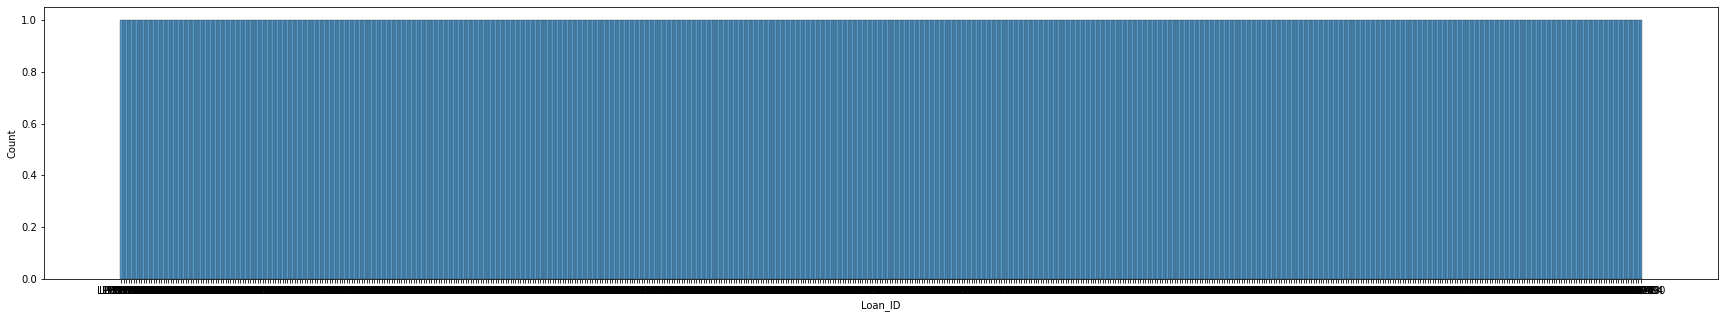

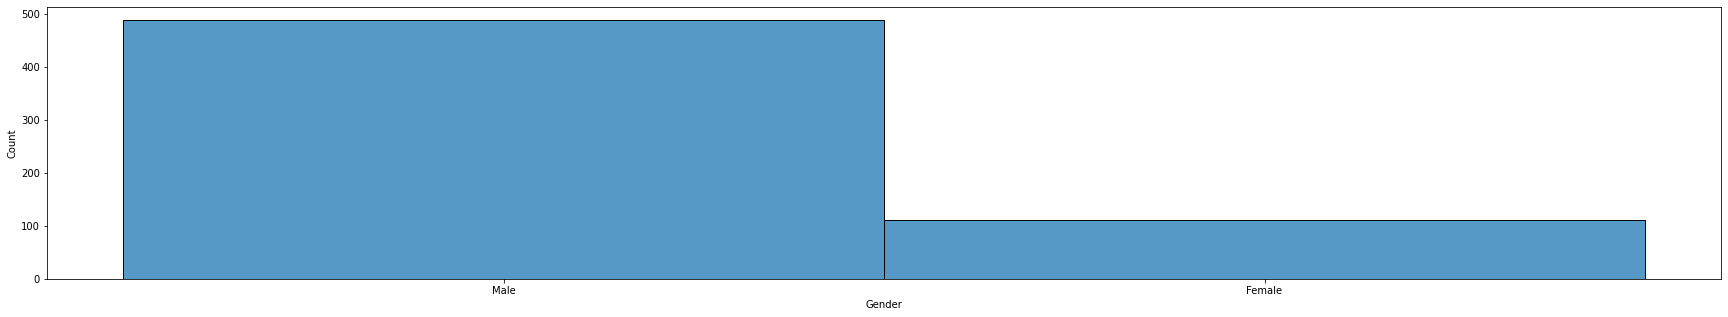

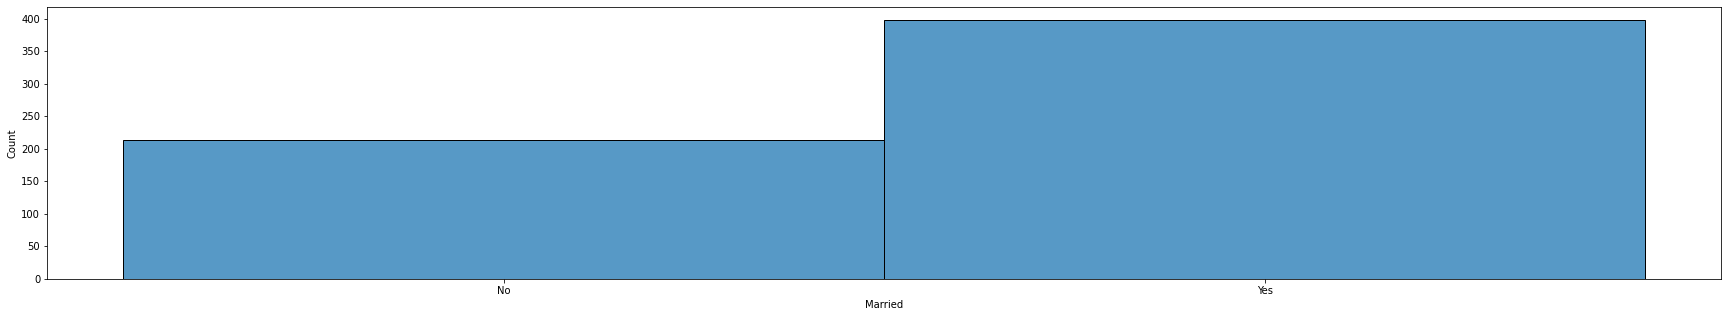

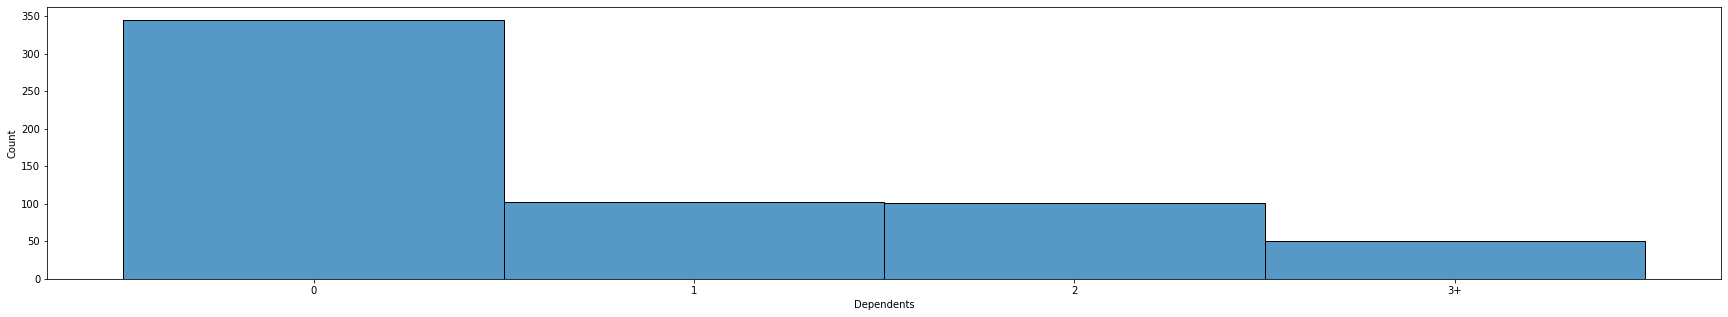

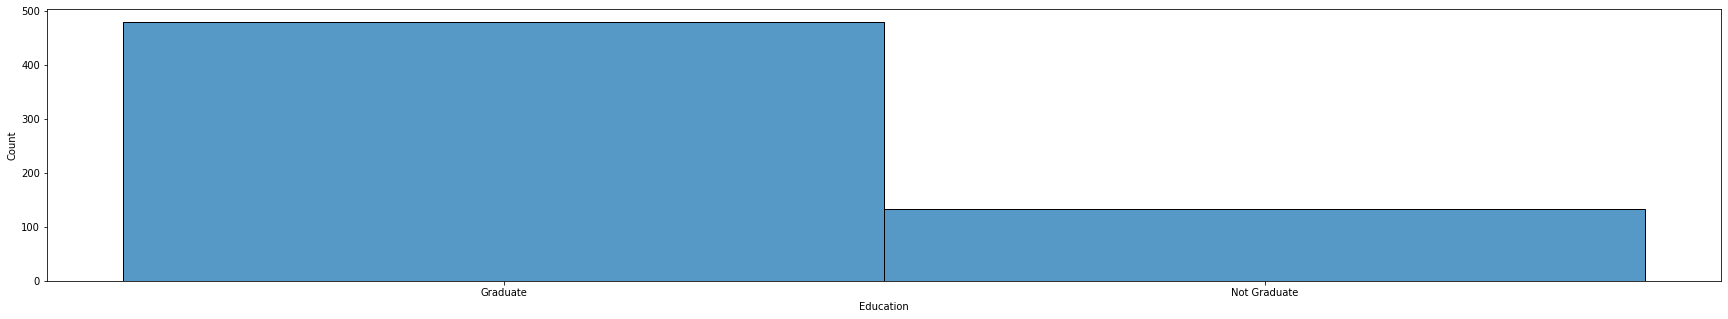

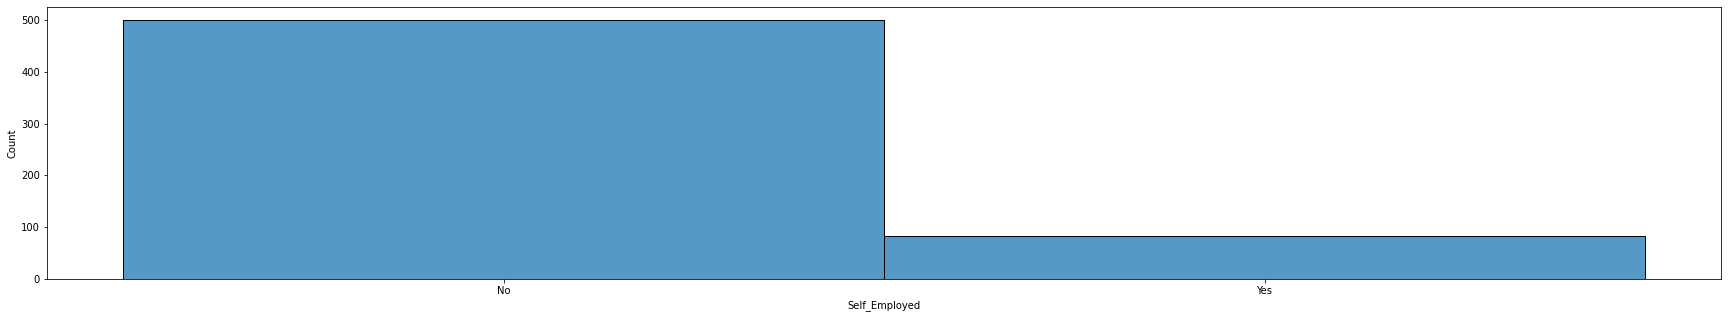

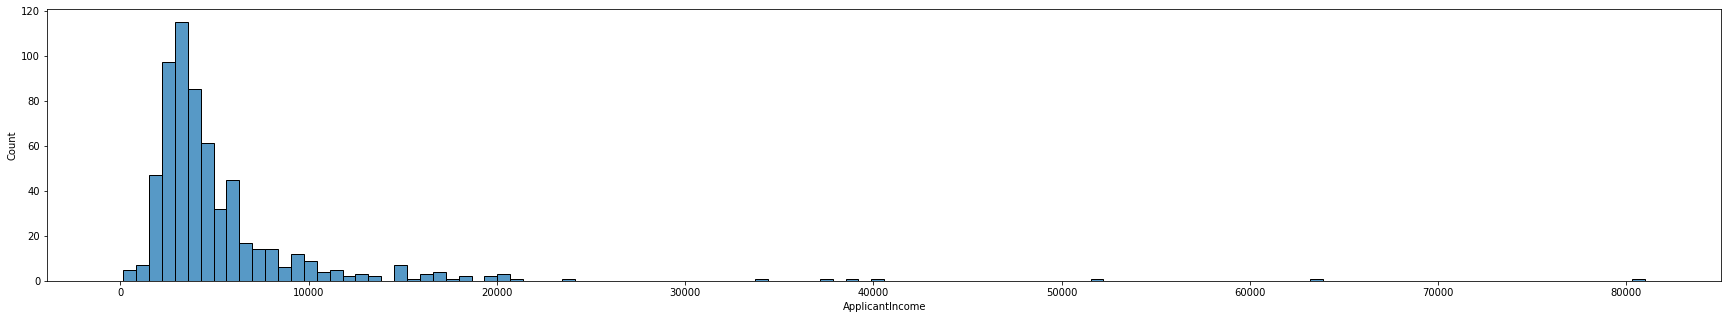

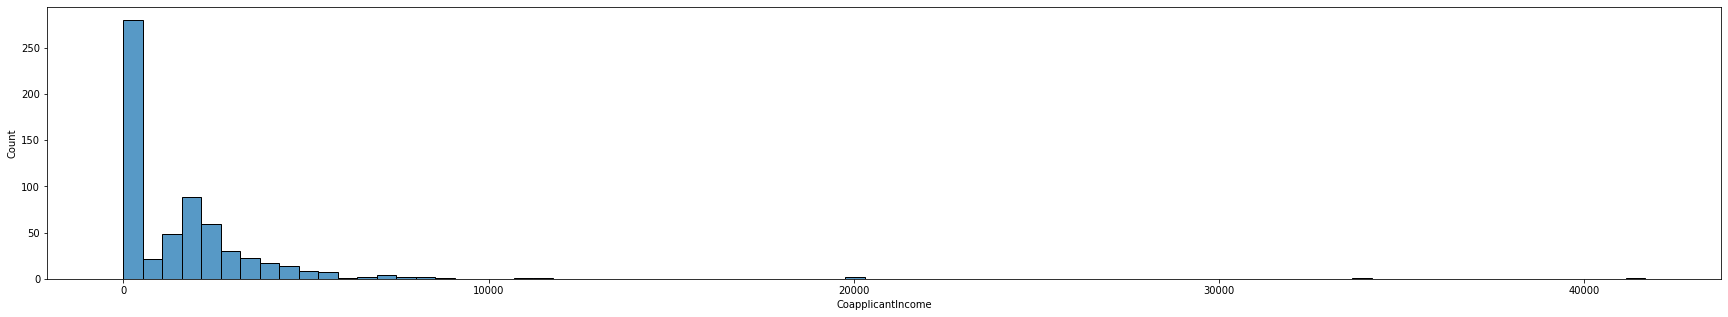

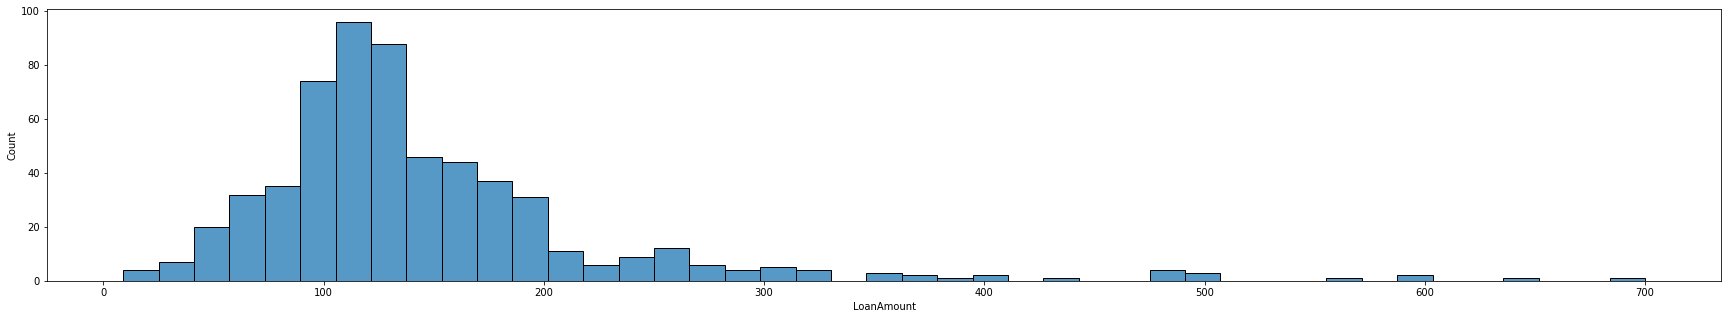

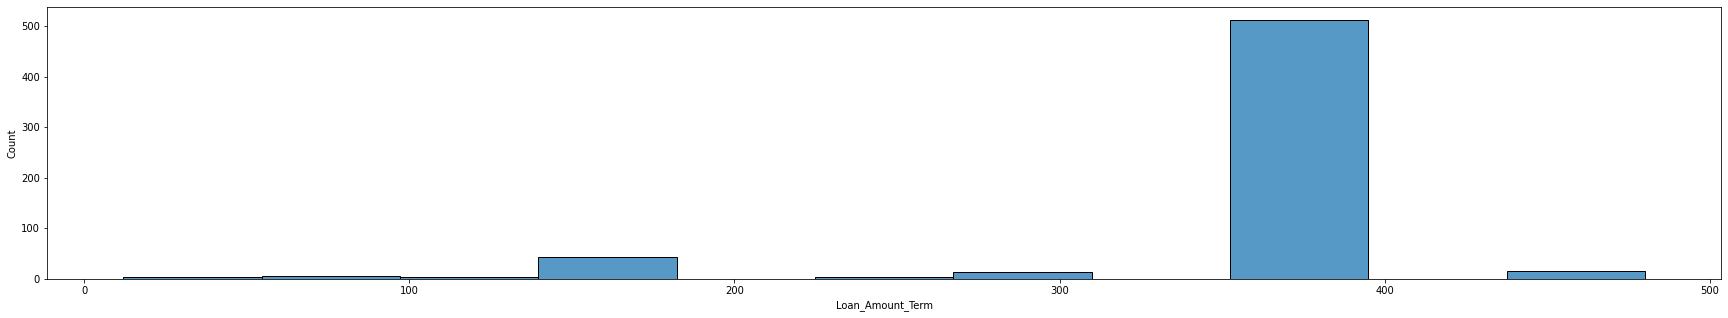

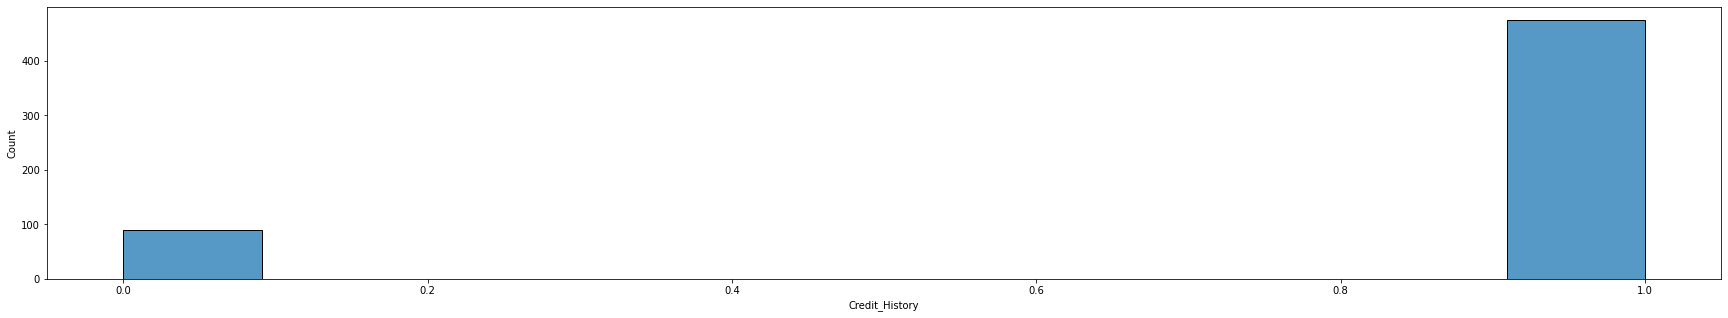

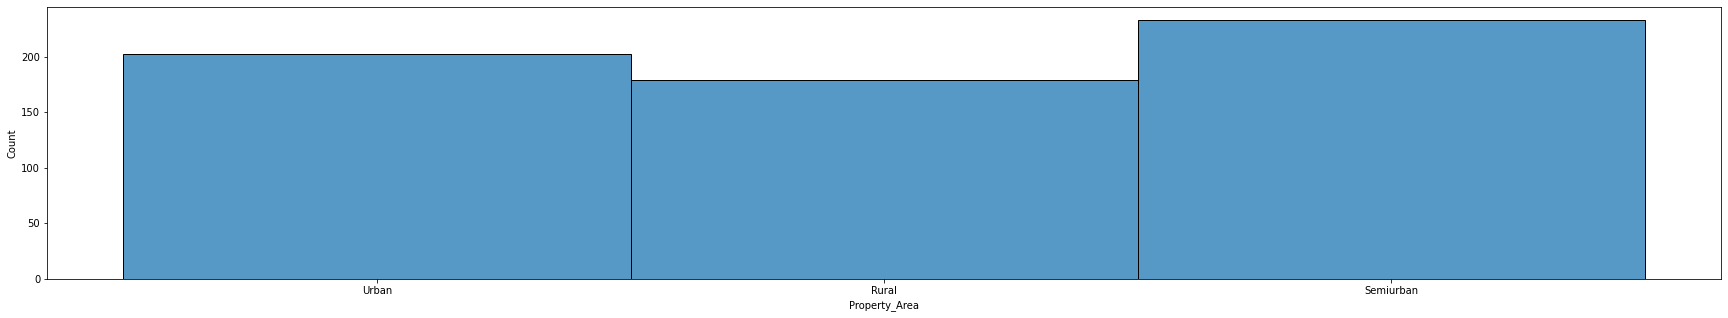

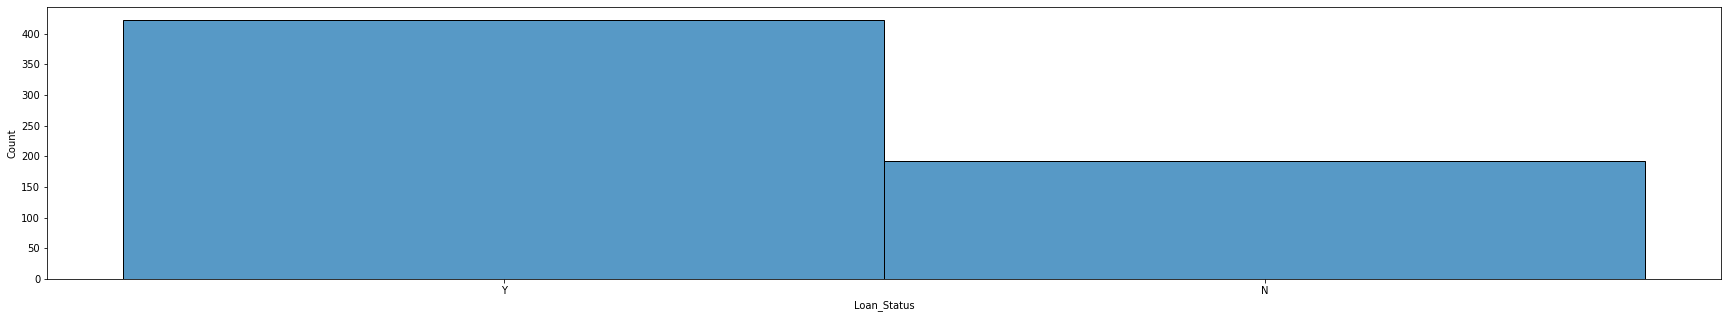

In [13]:
for column in data.columns:
    plt.figure(figsize = (30,5))
    sns.histplot(data[column])
    plt.show()

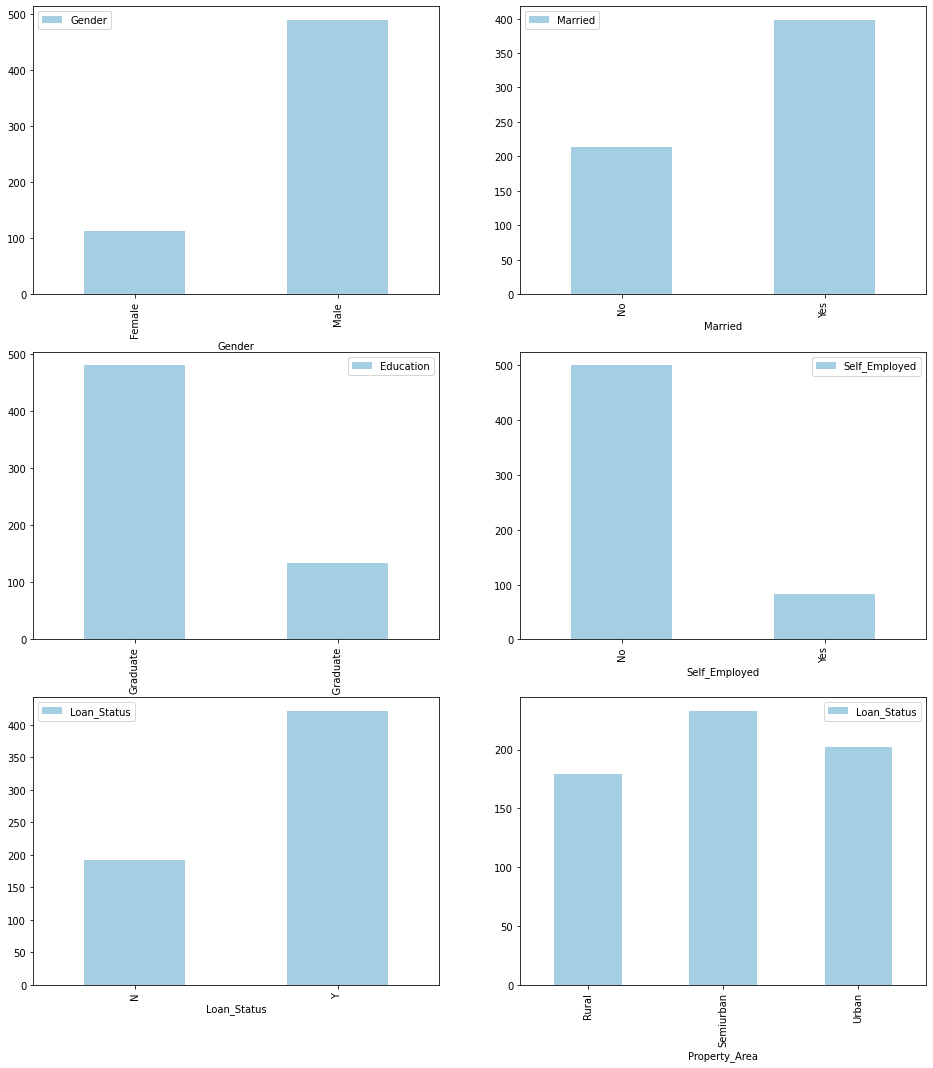

In [14]:
# Bar charts to get a high level view of categorical data

fig, ax = plt.subplots(3, 2, figsize=(16, 18))

data.groupby(['Gender'])[['Gender']].count().plot.bar(
    color=plt.cm.Paired(np.arange(len(data))), ax=ax[0,0])
data.groupby(['Married'])[['Married']].count().plot.bar(
    color=plt.cm.Paired(np.arange(len(data))), ax=ax[0,1])
data.groupby(['Education'])[['Education']].count().plot.bar(
    color=plt.cm.Paired(np.arange(len(data))), ax=ax[1,0])
data.groupby(['Self_Employed'])[['Self_Employed']].count().plot.bar(
    color=plt.cm.Paired(np.arange(len(data))), ax=ax[1,1])

data.groupby(['Loan_Status'])[['Loan_Status']].count().plot.bar(
    color=plt.cm.Paired(np.arange(len(data))),ax=ax[2,0])
data.groupby(['Property_Area'])[['Loan_Status']].count().plot.bar(
    color=plt.cm.Paired(np.arange(len(data))),ax=ax[2,1])

plt.show()

<AxesSubplot:xlabel='Credit_History'>

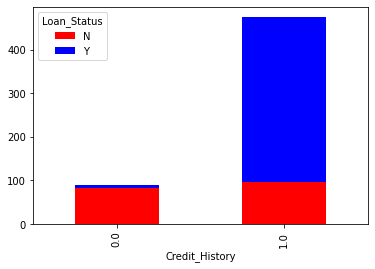

In [15]:
lc = pd.crosstab(data['Credit_History'], data['Loan_Status'])
lc.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [16]:
# Here, I pass all categorical columns into a list

categorical_columns = data.select_dtypes('object').columns.to_list()

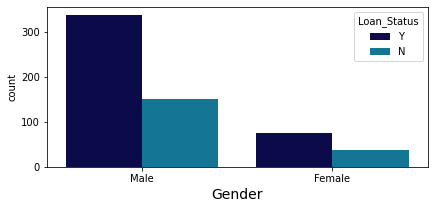

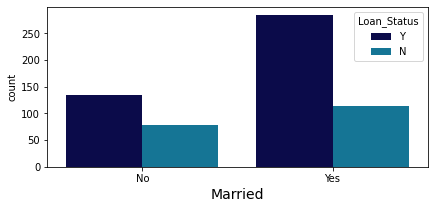

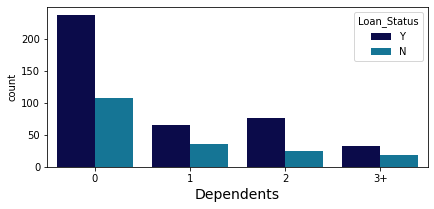

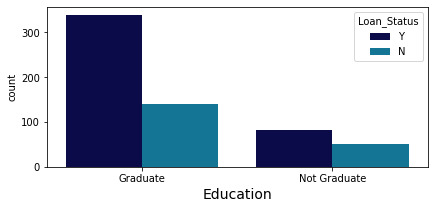

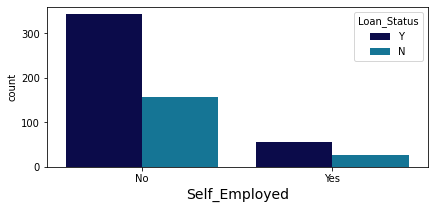

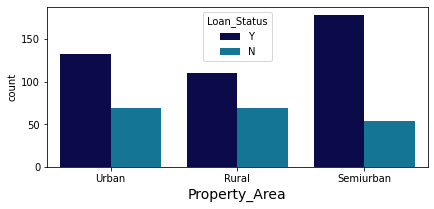

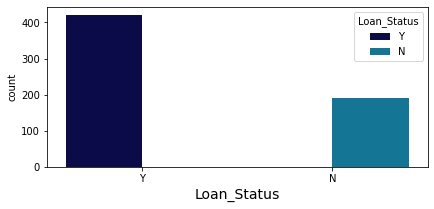

In [17]:
# This code loops through the list, and creates a chart for each

for i in categorical_columns[1:]: 
    plt.figure(figsize=(15,10))
    plt.subplot(3,2,1)
    sns.countplot(x=i ,hue='Loan_Status', data=data, palette='ocean')
    plt.xlabel(i, fontsize=14)

### Feature Engineering

In [18]:
data.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')>

In [19]:
data_used = data.drop(columns=["Loan_ID"])

### Split Dataset

In [20]:
# define X and Y
X = data_used.drop(['Loan_Status'], axis=1)
y = data_used['Loan_Status']

X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 22, stratify=y)

print(X_train.shape)
print(X_test.shape)

(399, 11)
(215, 11)


### Handling Missing Values

In [22]:
percent_missing = (X_train.isnull().sum() * 100 / len(X_train)).round(2)
missing_value_data = pd.DataFrame({'column_name': X_train.columns,
                                 'percent_missing': percent_missing})
missing_value_data.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_data

,column_name,percent_missing
Credit_History,Credit_History,7.02
Self_Employed,Self_Employed,6.27
LoanAmount,LoanAmount,2.51
Gender,Gender,2.01
Loan_Amount_Term,Loan_Amount_Term,1.75
Dependents,Dependents,1.50
Married,Married,0.50
Education,Education,0.00
ApplicantIncome,ApplicantIncome,0.00
CoapplicantIncome,CoapplicantIncome,0.00


In [23]:
percent_missing = (X_test.isnull().sum() * 100 / len(X_test)).round(2)
missing_value_data = pd.DataFrame({'column_name': X_test.columns,
                                 'percent_missing': percent_missing})
missing_value_data.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_data

,column_name,percent_missing
Credit_History,Credit_History,10.23
LoanAmount,LoanAmount,5.58
Dependents,Dependents,4.19
Self_Employed,Self_Employed,3.26
Loan_Amount_Term,Loan_Amount_Term,3.26
Gender,Gender,2.33
Married,Married,0.47
Education,Education,0.00
ApplicantIncome,ApplicantIncome,0.00
CoapplicantIncome,CoapplicantIncome,0.00


Credit_History (float), LoanAmount(float), Dependents (obj), Self_Employed(obj), Loan_Amount_Term(float), Gender(obj), Married(obj)

In [24]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399 entries, 510 to 222
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             391 non-null    object 
 1   Married            397 non-null    object 
 2   Dependents         393 non-null    object 
 3   Education          399 non-null    object 
 4   Self_Employed      374 non-null    object 
 5   ApplicantIncome    399 non-null    int64  
 6   CoapplicantIncome  399 non-null    float64
 7   LoanAmount         389 non-null    float64
 8   Loan_Amount_Term   392 non-null    float64
 9   Credit_History     371 non-null    float64
 10  Property_Area      399 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 37.4+ KB


In [25]:
from feature_engine.imputation import CategoricalImputer

# set up the imputer
imputer = CategoricalImputer(variables=['Gender', 'Self_Employed', 'Married', 'Dependents'])

# fit the imputer
imputer.fit(X_train)

# transform the data
X_train_t = imputer.transform(X_train)
X_test_t = imputer.transform(X_test)

In [26]:
percent_missing = (X_train_t.isnull().sum() * 100 / len(X_train_t)).round(2)
missing_value_data = pd.DataFrame({'column_name': X_train_t.columns,
                                 'percent_missing': percent_missing})
missing_value_data.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_data

,column_name,percent_missing
Credit_History,Credit_History,7.02
LoanAmount,LoanAmount,2.51
Loan_Amount_Term,Loan_Amount_Term,1.75
Gender,Gender,0.00
Married,Married,0.00
Dependents,Dependents,0.00
Education,Education,0.00
Self_Employed,Self_Employed,0.00
ApplicantIncome,ApplicantIncome,0.00
CoapplicantIncome,CoapplicantIncome,0.00


In [27]:
numerical_features = [column_name for column_name in X_train_t.columns if X_train_t[column_name].dtype == 'float64']
for feature in numerical_features:
    if -0.5 <= X_train_t[feature].skew() <= 0.5:
        mean = X_train_t[feature].mean()
        X_train_t[feature].fillna(mean, inplace=True)
        X_test_t[feature].fillna(mean, inplace=True)

    else:
        median = X_train_t[feature].median()
        X_train_t[feature].fillna(median, inplace=True)
        X_test_t[feature].fillna(median, inplace=True)

In [28]:
percent_missing = (X_train_t.isnull().sum() * 100 / len(X_train_t)).round(2)
missing_value_data = pd.DataFrame({'column_name': X_train_t.columns,
                                 'percent_missing': percent_missing})
missing_value_data.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_data

,column_name,percent_missing
Gender,Gender,0.0
Married,Married,0.0
Dependents,Dependents,0.0
Education,Education,0.0
Self_Employed,Self_Employed,0.0
ApplicantIncome,ApplicantIncome,0.0
CoapplicantIncome,CoapplicantIncome,0.0
LoanAmount,LoanAmount,0.0
Loan_Amount_Term,Loan_Amount_Term,0.0
Credit_History,Credit_History,0.0


In [29]:
X_test_t.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [30]:
y_train.isna().sum()

0

In [31]:
y_test.isna().sum()

0

### Handling Outliers

In [32]:
X_train_t.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [33]:
X_train_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399 entries, 510 to 222
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             399 non-null    object 
 1   Married            399 non-null    object 
 2   Dependents         399 non-null    object 
 3   Education          399 non-null    object 
 4   Self_Employed      399 non-null    object 
 5   ApplicantIncome    399 non-null    int64  
 6   CoapplicantIncome  399 non-null    float64
 7   LoanAmount         399 non-null    float64
 8   Loan_Amount_Term   399 non-null    float64
 9   Credit_History     399 non-null    float64
 10  Property_Area      399 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 37.4+ KB


In [34]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

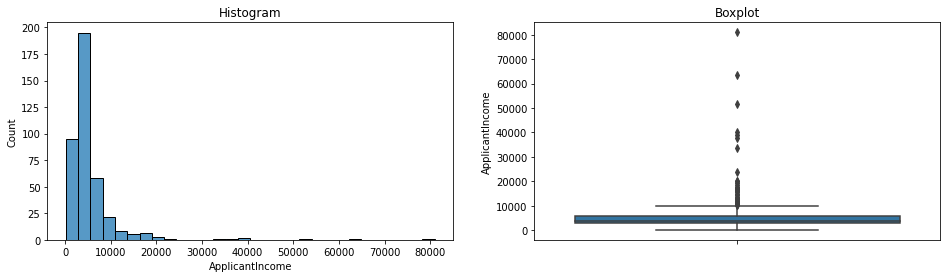

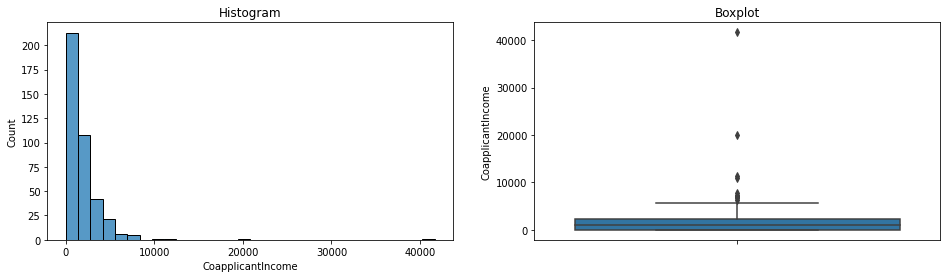

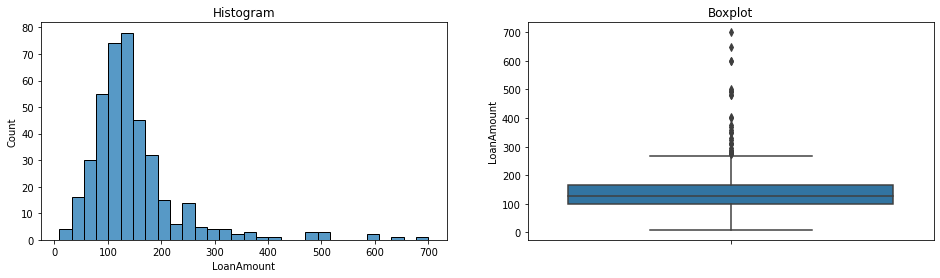

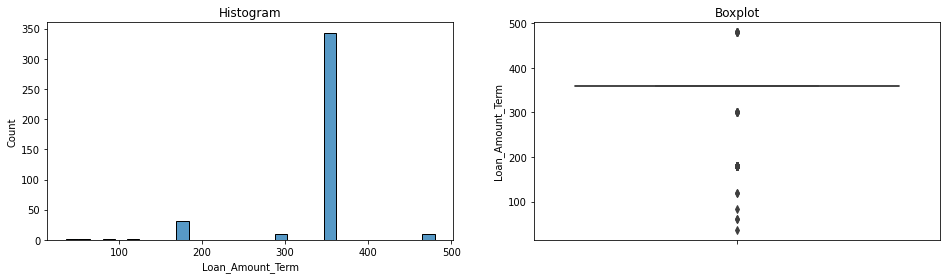

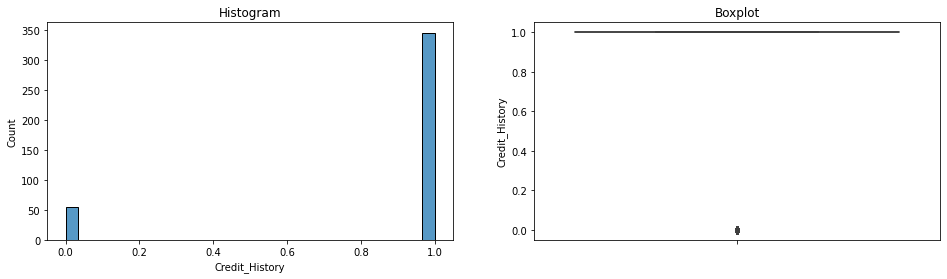

In [35]:
diagnostic_plots(X_train_t, 'ApplicantIncome')
diagnostic_plots(X_train_t, 'CoapplicantIncome')
diagnostic_plots(X_train_t, 'LoanAmount')
diagnostic_plots(X_train_t, 'Loan_Amount_Term')
diagnostic_plots(X_train_t, 'Credit_History')

In [36]:
from feature_engine.outliers import Winsorizer

cap = X_train_t[[ 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]

In [37]:
windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'])

In [38]:
windsoriser.fit(cap)

cap_t = windsoriser.transform(cap)

In [39]:
# Inspect the minimum caps for each variable
print('Left Tail Caps  : ', windsoriser.left_tail_caps_)

# Iinspect the maximum caps for each variable
print('Right Tail Caps : ', windsoriser.right_tail_caps_)

Left Tail Caps  :  {'ApplicantIncome': -1462.75, 'CoapplicantIncome': -3507.0, 'LoanAmount': -1.25}
Right Tail Caps :  {'ApplicantIncome': 10187.25, 'CoapplicantIncome': 5845.0, 'LoanAmount': 268.75}


In [40]:
print('Data - Before Capping')
print(cap.describe())
print('')
print('Data - After Capping')
print(cap_t.describe())

Data - Before Capping
       ApplicantIncome  CoapplicantIncome  LoanAmount
count       399.000000         399.000000  399.000000
mean       5631.320802        1596.172431  149.273183
std        7086.958378        2846.631888   91.198541
min         150.000000           0.000000    9.000000
25%        2906.000000           0.000000  100.000000
50%        3800.000000        1040.000000  128.000000
75%        5818.500000        2338.000000  167.500000
max       81000.000000       41667.000000  700.000000

Data - After Capping
       ApplicantIncome  CoapplicantIncome  LoanAmount
count       399.000000         399.000000  399.000000
mean       4625.467419        1423.157393  139.565789
std        2453.061646        1643.739044   59.501701
min         150.000000           0.000000    9.000000
25%        2906.000000           0.000000  100.000000
50%        3800.000000        1040.000000  128.000000
75%        5818.500000        2338.000000  167.500000
max       10187.250000        5845.000

ApplicantIncome - Before Capping


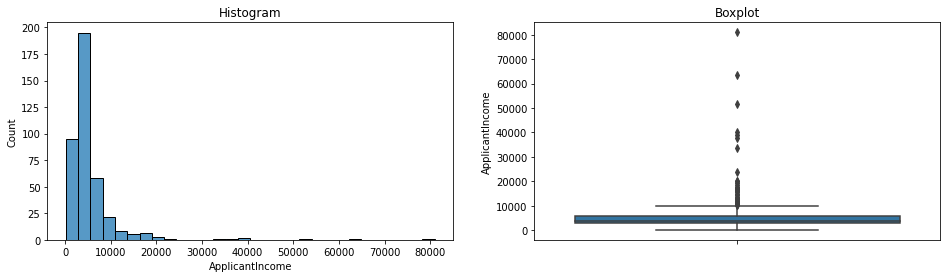


ApplicantIncome - After Capping


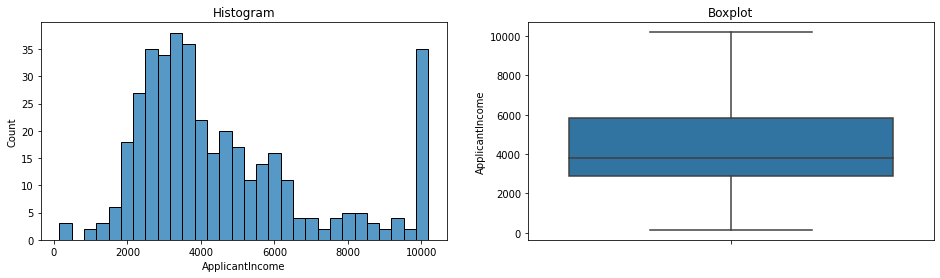

CoapplicantIncome - Before Capping


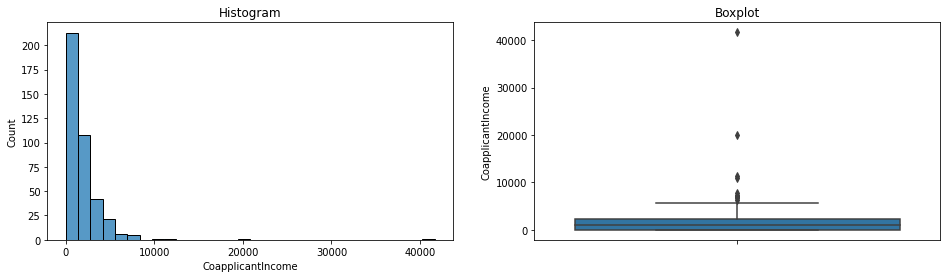


CoapplicantIncome - After Capping


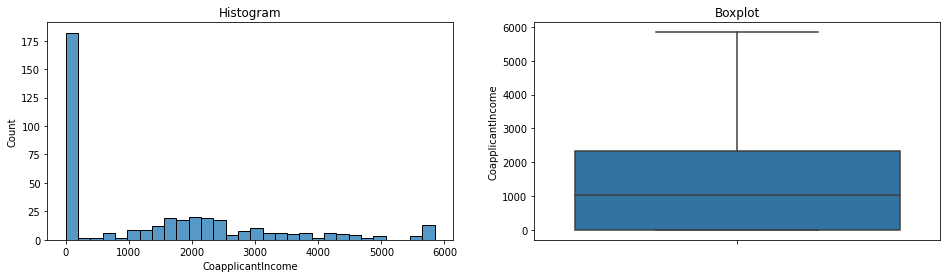

LoanAmount - Before Capping


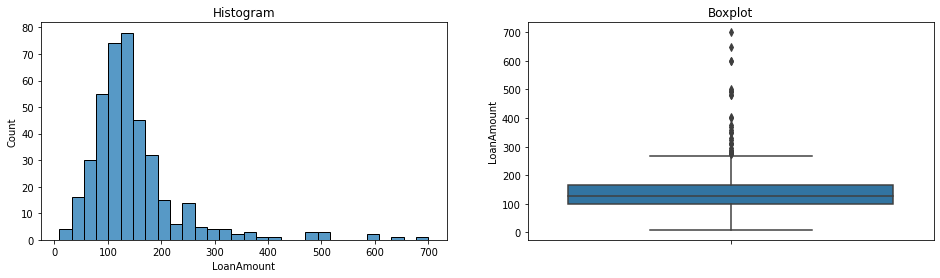


LoanAmount - After Capping


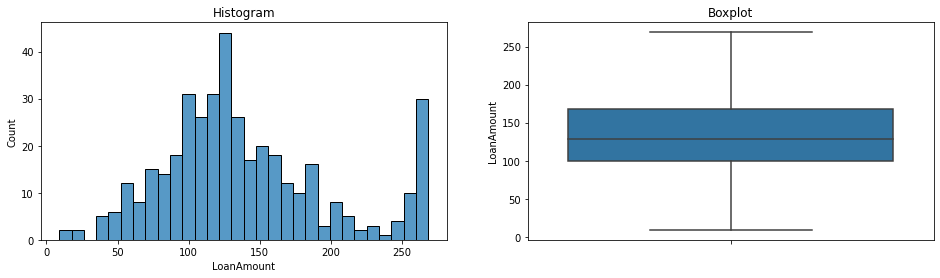

In [41]:
print('ApplicantIncome - Before Capping')
diagnostic_plots(cap, 'ApplicantIncome')
print('\nApplicantIncome - After Capping')
diagnostic_plots(cap_t, 'ApplicantIncome')

print('CoapplicantIncome - Before Capping')
diagnostic_plots(cap, 'CoapplicantIncome')
print('\nCoapplicantIncome - After Capping')
diagnostic_plots(cap_t, 'CoapplicantIncome')

print('LoanAmount - Before Capping')
diagnostic_plots(cap, 'LoanAmount')
print('\nLoanAmount - After Capping')
diagnostic_plots(cap_t, 'LoanAmount')

### Split Numerical and Categorical

In [42]:
num_columns = X_train_t.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train_t.select_dtypes(include=['object']).columns.tolist()

In [43]:
print('Numeric Columns :', num_columns)
print('Categorical Columns : ', cat_columns)

Numeric Columns : ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Categorical Columns :  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']


In [44]:
# Split on X_train

X_train_num = X_train_t[num_columns]
X_train_cat = X_train_t[cat_columns]


#Split on X_test

X_test_num = X_test_t[num_columns]
X_test_cat = X_test_t[cat_columns]

### Encoding

In [45]:
X_train_t.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
510,Male,No,0,Not Graduate,No,3598,1287.0,100.0,360.0,1.0,Rural
560,Male,Yes,2,Not Graduate,No,3675,242.0,108.0,360.0,1.0,Semiurban


In [46]:
from sklearn.preprocessing import OrdinalEncoder

encoder=OrdinalEncoder()
X_train_cat_enc = encoder.fit_transform(X_train_cat)
X_test_cat_enc = encoder.transform(X_test_cat)

### Scaling

In [47]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

### Concatenate

In [48]:
X_train_dc = np.concatenate([X_train_num_scaled, X_train_cat_enc],axis=1)
X_test_dc = np.concatenate([X_test_num_scaled, X_test_cat_enc],axis=1)

In [49]:
X_test_dc

array([[0.03839208, 0.        , 0.0593343 , ..., 0.        , 1.        ,
        2.        ],
       [0.04053185, 0.        , 0.18668596, ..., 0.        , 1.        ,
        2.        ],
       [0.03714286, 0.0374397 , 0.18089725, ..., 0.        , 1.        ,
        2.        ],
       ...,
       [0.12241187, 0.        , 0.17221418, ..., 0.        , 1.        ,
        1.        ],
       [0.04097712, 0.        , 0.16353111, ..., 0.        , 2.        ,
        2.        ],
       [0.04530612, 0.        , 0.15484805, ..., 0.        , 1.        ,
        2.        ]])

# Modeling

## Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
random_state = list(range(42))
random_state.append(None)
params = {'C': c_space,
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'random_state': random_state,
              'max_iter': list(range(100, 200, 100))}

In [53]:
lr = LogisticRegression()
lr_cv = GridSearchCV(lr, params, cv = 5)

In [54]:
lr_cv.fit(X_train_dc, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08]),
                         'max_iter': [100],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                          12, 13, 14, 15, 16, 17, 18, 19, 20,
                                          21, 22, 23, 24, 25, 26, 27, 28, 29, ...],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [55]:
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(lr_cv.best_params_)) 
print("Best score is {}".format(lr_cv.best_score_))

Tuned Decision Tree Parameters: {'C': 0.4393970560760795, 'max_iter': 100, 'random_state': 0, 'solver': 'newton-cg'}
Best score is 0.7945569620253164


In [56]:
lr = LogisticRegression(
    C = lr_cv.best_params_['C'], 
    max_iter = lr_cv.best_params_['max_iter'], 
    random_state = lr_cv.best_params_['random_state'], 
    solver = lr_cv.best_params_['solver'])

In [57]:
lr.fit(X_train_dc,y_train)

LogisticRegression(C=0.4393970560760795, random_state=0, solver='newton-cg')

In [58]:
from sklearn.metrics import accuracy_score
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(lr.score(X_train_dc, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(lr.score(X_test_dc, y_test)))

pred = lr.predict(X_test_dc)
print("Accuracy Score: {}".format(accuracy_score(y_test, pred)))

Accuracy of Logistic regression classifier on training set: 0.80
Accuracy of Logistic regression classifier on test set: 0.83
Accuracy Score: 0.8325581395348837


In [59]:
from sklearn.model_selection import cross_validate

cv_results_lr = cross_validate(lr, X_train_dc,y_train, scoring=('accuracy'), return_train_score=True)
print(f"Average score of Train Cross Validation is {cv_results_lr['test_score'].mean()}")

cv_results_logreg_test = cross_validate(lr, X_test_dc,y_test, scoring=('accuracy'), return_train_score=True)
print(f"Average score of Test Cross Validation is {cv_results_logreg_test['test_score'].mean()}")

Average score of Train Cross Validation is 0.7945569620253164
Average score of Test Cross Validation is 0.8325581395348838


In [60]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           N       0.94      0.49      0.65        67
           Y       0.81      0.99      0.89       148

    accuracy                           0.83       215
   macro avg       0.88      0.74      0.77       215
weighted avg       0.85      0.83      0.81       215



## Support Vector Machine

In [61]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters
svc.fit(X_train_dc,y_train)

SVC()

In [62]:
from sklearn.metrics import accuracy_score
print('Accuracy of SVM on training set: {:.2f}'.format(svc.score(X_train_dc, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'.format(svc.score(X_test_dc, y_test)))

pred_s = svc.predict(X_test_dc)
print("Accuracy Score: {}".format(accuracy_score(y_test, pred_s)))

Accuracy of SVM on training set: 0.80
Accuracy of SVM classifier on test set: 0.83
Accuracy Score: 0.8325581395348837


In [63]:
from sklearn.model_selection import cross_validate

cv_results_svc = cross_validate(svc, X_train_dc,y_train, scoring=('accuracy'), return_train_score=True)
print(f"Average score of Train Cross Validation is {cv_results_svc['test_score'].mean()}")

cv_results_svc_test = cross_validate(svc, X_test_dc,y_test, scoring=('accuracy'), return_train_score=True)
print(f"Average score of Test Cross Validation is {cv_results_svc_test['test_score'].mean()}")

Average score of Train Cross Validation is 0.7970569620253165
Average score of Test Cross Validation is 0.8232558139534885


In [64]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           N       0.94      0.49      0.65        67
           Y       0.81      0.99      0.89       148

    accuracy                           0.83       215
   macro avg       0.88      0.74      0.77       215
weighted avg       0.85      0.83      0.81       215



In [65]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [66]:
#creating hyperparameter grid
param_grid = {'C': [1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf', 'sigmoid']}

In [67]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 2, cv=3)

In [68]:
grid.fit(X_train_dc, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, ke

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=2)

In [69]:
# Print the tuned parameters and score
print("Tuned SVC Parameters: {}".format(grid.best_params_)) 
print("Best score is {}".format(grid.best_score_))

Tuned SVC Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best score is 0.7969924812030076


In [70]:
svec = SVC(
    C = grid.best_params_['C'],
    gamma = grid.best_params_['gamma'],
    kernel = grid.best_params_['kernel'])

In [71]:
svec.fit(X_train_dc,y_train)

SVC(C=1, gamma=0.1)

In [72]:
from sklearn.metrics import accuracy_score
print('Accuracy of Tuned SVC on training set: {:.2f}'.format(svec.score(X_train_dc, y_train)))
print('Accuracy of Tuned SVC classifier on test set: {:.2f}'.format(svec.score(X_test_dc, y_test)))

pred_s = svec.predict(X_test_dc)
print("Accuracy Score: {}".format(accuracy_score(y_test, pred_s)))

Accuracy of Tuned SVC on training set: 0.80
Accuracy of Tuned SVC classifier on test set: 0.83
Accuracy Score: 0.8325581395348837


In [73]:
from sklearn.model_selection import cross_validate

cv_results_svec = cross_validate(svec, X_train_dc,y_train, scoring=('accuracy'), return_train_score=True)
print(f"Average score of Train Cross Validation is {cv_results_svec['test_score'].mean()}")

cv_results_svec_test = cross_validate(svec, X_test_dc,y_test, scoring=('accuracy'), return_train_score=True)
print(f"Average score of Test Cross Validation is {cv_results_svec_test['test_score'].mean()}")

Average score of Train Cross Validation is 0.7970569620253165
Average score of Test Cross Validation is 0.8232558139534885


In [74]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_s))

              precision    recall  f1-score   support

           N       0.94      0.49      0.65        67
           Y       0.81      0.99      0.89       148

    accuracy                           0.83       215
   macro avg       0.88      0.74      0.77       215
weighted avg       0.85      0.83      0.81       215



## Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Creating the hyperparameter grid
params_dt = {
    'max_depth': [2,4,10],
    'min_samples_leaf':[10,20,50],
    'criterion':["gini", "entropy"]
}


dt = DecisionTreeClassifier(random_state=22)

#Instantiate the GridSearch model
grid_search = GridSearchCV(estimator = dt, param_grid = params_dt, cv=4, verbose=1, scoring="accuracy")

In [76]:
%%time
grid_search.fit(X_train_dc, y_train)

Fitting 4 folds for each of 18 candidates, totalling 72 fits
CPU times: total: 156 ms
Wall time: 141 ms


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=22),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 10],
                         'min_samples_leaf': [10, 20, 50]},
             scoring='accuracy', verbose=1)

In [77]:
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(grid_search.best_params_)) 
print("Best score is {}".format(grid_search.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 20}
Best score is 0.7969949494949495


In [78]:
dtbest = DecisionTreeClassifier(criterion = grid_search.best_params_['criterion'],
                                max_depth = grid_search.best_params_['max_depth'],
                                min_samples_leaf = grid_search.best_params_['min_samples_leaf'])

dtbest.fit(X_train_dc,y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=20)

In [79]:
from sklearn.metrics import accuracy_score
print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(dtbest.score(X_train_dc, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(dtbest.score(X_test_dc, y_test)))

pred = dtbest.predict(X_test_dc)
print("Accuracy Score: {}".format(accuracy_score(y_test, pred)))

Accuracy of Decision Tree classifier on training set: 0.80
Accuracy of Decision Tree classifier on test set: 0.83
Accuracy Score: 0.8325581395348837


In [80]:
from sklearn.model_selection import cross_validate

cv_results_dt = cross_validate(dtbest, X_train_dc,y_train, scoring=('accuracy'), return_train_score=True)
print(f"Average score of Train Cross Validation is {cv_results_dt['test_score'].mean()}")

cv_results_dt_test = cross_validate(dtbest, X_test_dc, y_test, scoring=('accuracy'), return_train_score=True)
print(f"Average score of Test Cross Validation is {cv_results_dt_test['test_score'].mean()}")

Average score of Train Cross Validation is 0.7970569620253165
Average score of Test Cross Validation is 0.8325581395348838


In [81]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           N       0.94      0.49      0.65        67
           Y       0.81      0.99      0.89       148

    accuracy                           0.83       215
   macro avg       0.88      0.74      0.77       215
weighted avg       0.85      0.83      0.81       215



## Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier

#Create Classifiers
rf = RandomForestClassifier()

params_rf = {'n_estimators' : [5,20,50],
          'max_features' : ['auto', 'sqrt'],
            'min_samples_split' : [2,5],
            'min_samples_leaf' : [10,20,50],
            'bootstrap':[True, False]}

In [83]:
rf_grid = GridSearchCV(estimator = rf, param_grid = params_rf, cv=4, verbose=1, scoring="accuracy")

In [84]:
%%time
rf_grid.fit(X_train_dc, y_train)

Fitting 4 folds for each of 72 candidates, totalling 288 fits
CPU times: total: 7.2 s
Wall time: 7.21 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [10, 20, 50],
                         'min_samples_split': [2, 5],
                         'n_estimators': [5, 20, 50]},
             scoring='accuracy', verbose=1)

In [85]:
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(rf_grid.best_params_)) 
print("Best score is {}".format(rf_grid.best_score_))

Tuned Decision Tree Parameters: {'bootstrap': True, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 20}
Best score is 0.7969949494949495


In [86]:
rfbest = RandomForestClassifier(n_estimators = rf_grid.best_params_['n_estimators'],
                                max_features = rf_grid.best_params_['max_features'],
                                min_samples_split = rf_grid.best_params_['min_samples_leaf'],
                                min_samples_leaf = rf_grid.best_params_['min_samples_leaf'],
                                bootstrap = rf_grid.best_params_['bootstrap'])

In [87]:
rfbest.fit(X_train_dc,y_train)

RandomForestClassifier(min_samples_leaf=10, min_samples_split=10,
                       n_estimators=20)

In [88]:
from sklearn.metrics import accuracy_score
print('Accuracy of Random Forest classifier on training set: {:.2f}'.format(rfbest.score(X_train_dc, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rfbest.score(X_test_dc, y_test)))

pred = rfbest.predict(X_test_dc)
print("Accuracy Score: {}".format(accuracy_score(y_test, pred)))

Accuracy of Random Forest classifier on training set: 0.80
Accuracy of Random Forest classifier on test set: 0.83
Accuracy Score: 0.8325581395348837


In [89]:
from sklearn.model_selection import cross_validate

cv_results_rf = cross_validate(rfbest, X_train_dc,y_train, scoring=('accuracy'), return_train_score=True)
print(f"Average score of Train Cross Validation is {cv_results_rf['test_score'].mean()}")

cv_results_rf_test = cross_validate(rfbest, X_test_dc, y_test, scoring=('accuracy'), return_train_score=True)
print(f"Average score of Test Cross Validation is {cv_results_rf_test['test_score'].mean()}")

Average score of Train Cross Validation is 0.7970569620253165
Average score of Test Cross Validation is 0.8093023255813954


In [90]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           N       0.94      0.49      0.65        67
           Y       0.81      0.99      0.89       148

    accuracy                           0.83       215
   macro avg       0.88      0.74      0.77       215
weighted avg       0.85      0.83      0.81       215



## kNN

In [91]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

#Creating Hyperparameter Tuning
params_knn = { 'n_neighbors' : [3, 5],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

gs = GridSearchCV(KNeighborsClassifier(), params_knn, verbose = 1, cv=3)

In [92]:
%%time
gs.fit(X_train_dc, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
CPU times: total: 156 ms
Wall time: 144 ms


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [3, 5],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [93]:
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(gs.best_params_)) 

print("Best score is {}".format(gs.best_score_))

Tuned Decision Tree Parameters: {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}
Best score is 0.6992481203007519


In [94]:
knnbest = KNeighborsClassifier(n_neighbors = gs.best_params_['n_neighbors'],
                                weights = gs.best_params_['weights'],
                                metric = gs.best_params_['metric'])

In [95]:
knnbest.fit(X_train_dc,y_train)

KNeighborsClassifier()

In [96]:
from sklearn.metrics import accuracy_score
print('Accuracy of KNN on training set: {:.2f}'.format(knnbest.score(X_train_dc, y_train)))
print('Accuracy of KNN on test set: {:.2f}'.format(knnbest.score(X_test_dc, y_test)))

pred = knnbest.predict(X_test_dc)
print("Accuracy Score: {}".format(accuracy_score(y_test, pred)))

Accuracy of KNN on training set: 0.77
Accuracy of KNN on test set: 0.78
Accuracy Score: 0.7813953488372093


In [97]:
from sklearn.model_selection import cross_validate

cv_results_knn = cross_validate(knnbest, X_train_dc,y_train, scoring=('accuracy'), return_train_score=True)
print(f"Average score of Train Cross Validation is {cv_results_knn['test_score'].mean()}")

cv_results_knn_test = cross_validate(knnbest, X_test_dc,y_test, scoring=('accuracy'), return_train_score=True)
print(f"Average score of Test Cross Validation is {cv_results_knn_test['test_score'].mean()}")

Average score of Train Cross Validation is 0.7193670886075949
Average score of Test Cross Validation is 0.7674418604651163


In [98]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           N       0.76      0.43      0.55        67
           Y       0.79      0.94      0.86       148

    accuracy                           0.78       215
   macro avg       0.77      0.69      0.70       215
weighted avg       0.78      0.78      0.76       215



## Gradient Boosting Classifier

In [99]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,250],
    "max_depth":[1,3,5,7],
    "learning_rate":[0.01,0.1,1]}

gbcv = GridSearchCV(gbc,parameters,cv=5)

In [100]:
%%time
gbcv.fit(X_train_dc, y_train)

CPU times: total: 15.2 s
Wall time: 15.3 s


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [1, 3, 5, 7],
                         'n_estimators': [5, 50, 250]})

In [101]:
# Print the tuned parameters and score
print("Tuned Gradient Boosting Classifier Parameters: {}".format(gbcv.best_params_)) 

print("Best score is {}".format(gbcv.best_score_))

Tuned Gradient Boosting Classifier Parameters: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
Best score is 0.7970569620253165


In [102]:
gbcbest = GradientBoostingClassifier(learning_rate = gbcv.best_params_['learning_rate'],
                                max_depth = gbcv.best_params_['max_depth'],
                                n_estimators = gbcv.best_params_['n_estimators'])

In [103]:
gbcbest.fit(X_train_dc,y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=1, n_estimators=50)

In [104]:
from sklearn.metrics import accuracy_score
print('Accuracy of Gradient Boost Classifier on training set: {:.2f}'.format(gbcbest.score(X_train_dc, y_train)))
print('Accuracy of Gradient Boost Classifier on test set: {:.2f}'.format(gbcbest.score(X_test_dc, y_test)))

pred = gbcbest.predict(X_test_dc)
print("Accuracy Score: {}".format(accuracy_score(y_test, pred)))

Accuracy of Gradient Boost Classifier on training set: 0.80
Accuracy of Gradient Boost Classifier on test set: 0.83
Accuracy Score: 0.8325581395348837


In [105]:
from sklearn.model_selection import cross_validate

cv_results_gbc = cross_validate(gbcbest, X_train_dc,y_train, scoring=('accuracy'), return_train_score=True)
print(f"Average score of Train Cross Validation is {cv_results_gbc['test_score'].mean()}")

cv_results_gbc_test = cross_validate(gbcbest, X_test_dc,y_test, scoring=('accuracy'), return_train_score=True)
print(f"Average score of Test Cross Validation is {cv_results_gbc_test['test_score'].mean()}")

Average score of Train Cross Validation is 0.7970569620253165
Average score of Test Cross Validation is 0.8325581395348838


In [106]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           N       0.94      0.49      0.65        67
           Y       0.81      0.99      0.89       148

    accuracy                           0.83       215
   macro avg       0.88      0.74      0.77       215
weighted avg       0.85      0.83      0.81       215



1. Logreg 0.83
2. SVM base 0.83
3. SVM tuned 0.83
4. DT 0.83
5. RF 0.83 (low cv)
6. kNN 0.78
7. GBC 0.83

## Building Pipeline

In [107]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
import pickle

num_pipeline = make_pipeline(MinMaxScaler())
cat_pipeline = make_pipeline(OrdinalEncoder())

df_pipeline = ColumnTransformer([('pipe_num', num_pipeline, num_columns),
                                 ('pipe_cat', cat_pipeline, cat_columns)])

#Final Pipeline
pipe_log_reg = make_pipeline(df_pipeline, lr)


In [108]:
pipe_log_reg.fit(X_train_t, y_train)

#Predict Error on Train-Set and test-set
y_pred_train_lr_pipe = pipe_log_reg.predict(X_train_t)
y_pred_test_lr_pipe = pipe_log_reg.predict(X_test_t)

#Evaluation of Error
from sklearn.metrics import accuracy_score
# print('Accuracy of Tuned SVC on training set: {:.2f}'.format(svec.score(X_train_dc, y_train)))
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(lr.score(X_train_dc, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(lr.score(X_test_dc, y_test)))
print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred_test_lr_pipe)))

from sklearn.model_selection import cross_validate

cv_results_lr = cross_validate(lr, X_train_dc,y_train, scoring=('accuracy'), return_train_score=True)
print(f"Average score of Train Cross Validation is {cv_results_lr['test_score'].mean()}")

cv_results_logreg_test = cross_validate(lr, X_test_dc,y_test, scoring=('accuracy'), return_train_score=True)
print(f"Average score of Test Cross Validation is {cv_results_logreg_test['test_score'].mean()}")

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test_lr_pipe))

Accuracy of Logistic regression classifier on training set: 0.80
Accuracy of Logistic regression classifier on test set: 0.83
Accuracy Score: 0.8325581395348837
Average score of Train Cross Validation is 0.7945569620253164
Average score of Test Cross Validation is 0.8325581395348838
              precision    recall  f1-score   support

           N       0.94      0.49      0.65        67
           Y       0.81      0.99      0.89       148

    accuracy                           0.83       215
   macro avg       0.88      0.74      0.77       215
weighted avg       0.85      0.83      0.81       215



In [109]:
with open("full_pipe.pkl", "wb") as f:
    pickle.dump(pipe_log_reg, f)

## Model Inference

In [110]:
data_inf = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

In [111]:
data_inf.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [112]:
from feature_engine.imputation import CategoricalImputer

# set up the imputer
imputer = CategoricalImputer(variables=['Gender', 'Self_Employed', 'Married', 'Dependents'])

# fit the imputer
imputer.fit(data_inf)

# transform the data
data_inf_t = imputer.transform(data_inf)

In [113]:
numerical_features = [column_name for column_name in data_inf_t.columns if data_inf_t[column_name].dtype == 'float64']
for feature in numerical_features:
    if -0.5 <= data_inf_t[feature].skew() <= 0.5:
        mean = data_inf_t[feature].mean()
        data_inf_t[feature].fillna(mean, inplace=True)

    else:
        median = data_inf_t[feature].median()
        data_inf_t[feature].fillna(median, inplace=True)

In [114]:
data_inf_t.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [115]:
data_infs = data_inf_t.drop(columns=["Loan_ID"])

In [116]:
with open("full_pipe.pkl", "rb") as f:
    pipeline = pickle.load(f)

In [117]:
y_pred_inf = pipeline.predict(data_infs)
y_pred_inf = pd.DataFrame(y_pred_inf, columns=['Loan Acceptance-Prediction'])

In [118]:
# Concate to Original Dataframe
df_inf_result = pd.concat([data_inf, y_pred_inf], axis=1)

In [119]:
df_inf_result

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan Acceptance-Prediction
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,Y
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,Y
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,Y
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,Y


## Kesimpulan

### EDA Analysis

Dari hasil EDA, ada beberapa poin yang bisa diambil.

Dataset ini merupakan dataset peminjaman uang. Sehingga seperti yang biasa kita ketahui, ada beberapa hal yang selalu dikonsiderasi oleh pihak _lender_ pada calon peminjamnya seperti Pekerjaan dan tingkat pendidikan.

Poin pekerjaan ini sangat terlihat pada EDA dimana orang-orang yang **tidak Self-Employed** cenderung di approve request peminjaman uangnya. 
Sebenarnya hal ini cukup wajar karena di Indonesia sendiri, wirausahawan merupakan salah satu jenis pekerjaan yang sulit mendapatkan hutang bank (misal KPR).

Kemudian disini, juga terlihat bahwa pihak peminjam lebih menyukai calon peminjam yang memiliki tingkat pendidikan graduate (atau pascasarjana) dibanding yang undergraduate. dan juga lebih banyak peminjam laki-laki yang di approve daripada peminjam perempuan.

Namun untuk dua hal diatas ini bisa jadi karena rasio peminjam laki-laki lebih banyak dan rasio peminjam Graduate lebih banyak.

### Model Analysis

Untuk model analysis, saya disini mencoba beberapa macam modelling dan yang cukup mengejutkan adalah hampir semua nilai akurasinya seragam:

1. Logreg 0.83
2. SVM base 0.83
3. SVM tuned 0.83
4. DT 0.83
5. RF 0.83 (low cv)
6. kNN 0.78
7. GBC 0.83

Sehingga sebenarnya bisa dikatakan bahwa untuk mengimprove akurasi yang harus dilakukan adalah memperhatikan tahapan Data Cleaningnya daripada memodifikasi hyperparameter tuningnya.

Pada model inference saya menggunakan Logistic Regression karena mempertimbangkan simplisitas dan waktu execute, dengan akurasi yang sama, Logistic Regression lebih unggul.

## Overall Analysis

- Dari hasil EDA sendiri sebenarnya sudah terlihat bahwa dataset ini tidak _imbalance_ dan cukup representatif dengan kondisi sebenarnya dari regulasi yang ada pada perusahaan peminjaman uang (atau bank)
- Ada beberapa hal yang bisa diperhatikan lagi seperti status pernikahan sebenarnya tidak terlalu memengaruhi dan juga lokasi properti. Karena dari hasil EDA sendiri juga terlihat bahwa baik lokasi pada Urban, Semiurban, ataupun Rural, seluruhnya hampir sama saja mendapatkan lending.
- Secara garis besar, dataset ini merupakan dataset yang baik. Namun bisa jauh lebih baik lagi jika data yang dikumpulkan lebih banyak atau bisa di spesifikasikan ini merupakan data peminjaman pada negara (atau negara bagian) apa. karena berbeda negara pasti berbeda lokasi dan juga berbeda sampelnya (Hal ini terlihat sebenarnya pada persentase Graduate yang mendapatkan pinjaman lebih banyak. di Amerika, jika ingin kuliah harus mengambil student_loan, beda dengan indonesia. Jika asumsinya dataset ini adalah di amerika, maka akan sangat wajar jumlah Graduate yang banyak mendapat loan)